In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv('BA - Assignment Part 2 data set.csv')

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
null_values = df.isnull().sum()  # Count null values in each column
print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [ ]:
columns_to_drop = ['Clothing ID', 'Age', 'Title', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Cleaned_Text', 'Sentiment']

# Check if columns exist in DataFrame before dropping
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop columns
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Drop rows with null values in the "Review Text" column
df.dropna(subset=['Review Text'], inplace=True)


In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # To check if the text is a string
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Removing stopwords and non-alphabetic tokens
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return tokens
    else:
        return []  # Return an empty list if text is not a string (NaN)


In [ ]:
# Apply preprocessing to review text
df['Cleaned_Text'] = df['Review Text'].apply(preprocess_text)


In [ ]:
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        analyzer = SentimentIntensityAnalyzer()
        score = analyzer.polarity_scores(text)['compound']
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for non-string values (NaN)


In [ ]:
# Apply sentiment analysis
df['Sentiment'] = df['Review Text'].apply(analyze_sentiment)

In [ ]:
# Summarize sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()

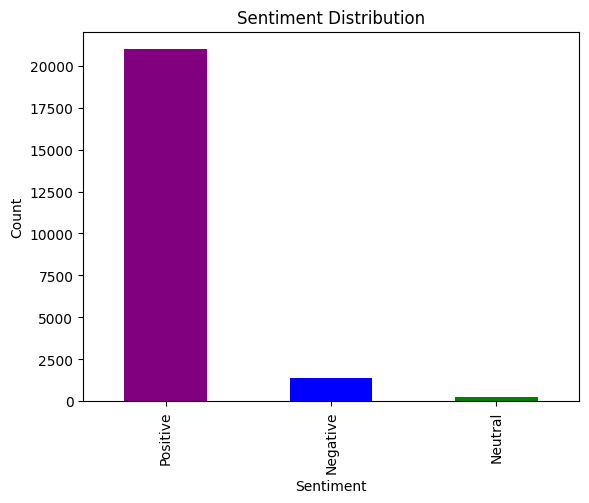

In [ ]:
# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', color=['Purple', 'Blue', 'Green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Identify key themes in positive and negative feedback using word frequency analysis
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Review Text'])



In [ ]:
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Review Text'])


In [ ]:
positive_tokens = preprocess_text(positive_reviews)
negative_tokens = preprocess_text(negative_reviews)


In [ ]:
positive_word_freq = Counter(positive_tokens)
print(positive_word_freq)

Counter({'dress': 10606, 'fit': 9722, 'size': 8796, 'love': 8782, 'top': 7924, 'like': 6583, 'color': 6554, 'look': 6434, 'wear': 6213, 'great': 5997, 'would': 4973, 'fabric': 4474, 'small': 4258, 'perfect': 3712, 'really': 3646, 'little': 3618, 'ordered': 3532, 'one': 3422, 'flattering': 3319, 'soft': 3194, 'well': 3111, 'comfortable': 3001, 'nice': 2905, 'cute': 2883, 'bought': 2850, 'beautiful': 2841, 'back': 2824, 'bit': 2738, 'large': 2585, 'material': 2579, 'shirt': 2548, 'length': 2531, 'much': 2522, 'jean': 2502, 'sweater': 2498, 'run': 2466, 'work': 2372, 'also': 2348, 'got': 2308, 'petite': 2267, 'long': 2261, 'short': 2191, 'could': 2155, 'waist': 2146, 'medium': 2117, 'pretty': 2107, 'skirt': 2084, 'think': 2084, 'quality': 2059, 'x': 2000, 'make': 1990, 'retailer': 1989, 'feel': 1984, 'even': 1945, 'pant': 1940, 'store': 1929, 'tried': 1913, 'usually': 1887, 'get': 1858, 'sleeve': 1835, 'good': 1831, 'way': 1757, 'go': 1692, 'made': 1675, 'big': 1662, 'still': 1652, 'super

In [ ]:
negative_word_freq = Counter(negative_tokens)
print(negative_word_freq)

Counter({'dress': 654, 'size': 472, 'like': 404, 'look': 398, 'would': 396, 'fit': 359, 'fabric': 343, 'back': 328, 'color': 315, 'top': 312, 'wear': 268, 'small': 267, 'ordered': 255, 'really': 244, 'one': 233, 'also': 207, 'shirt': 207, 'could': 203, 'material': 203, 'cut': 198, 'way': 194, 'even': 192, 'love': 190, 'sweater': 181, 'quality': 180, 'disappointed': 180, 'large': 171, 'much': 154, 'flattering': 152, 'big': 147, 'tried': 146, 'retailer': 145, 'waist': 142, 'unfortunately': 140, 'short': 140, 'petite': 138, 'run': 134, 'cute': 133, 'tight': 132, 'work': 132, 'looked': 132, 'get': 132, 'made': 129, 'little': 128, 'return': 125, 'arm': 123, 'bit': 120, 'sleeve': 120, 'going': 119, 'skirt': 117, 'long': 116, 'model': 116, 'right': 116, 'design': 115, 'bought': 114, 'see': 114, 'front': 113, 'pant': 110, 'usually': 109, 'price': 109, 'soft': 109, 'well': 108, 'loose': 108, 'wanted': 108, 'store': 107, 'online': 107, 'picture': 105, 'go': 104, 'x': 103, 'thin': 102, 'shoulder'

In [ ]:
print("Top 10 words in positive feedback:")
print(positive_word_freq.most_common(10))


Top 10 words in positive feedback:
[('dress', 10606), ('fit', 9722), ('size', 8796), ('love', 8782), ('top', 7924), ('like', 6583), ('color', 6554), ('look', 6434), ('wear', 6213), ('great', 5997)]


In [ ]:
print("\nTop 10 words in negative feedback:")
print(negative_word_freq.most_common(10))


Top 10 words in negative feedback:
[('dress', 654), ('size', 472), ('like', 404), ('look', 398), ('would', 396), ('fit', 359), ('fabric', 343), ('back', 328), ('color', 315), ('top', 312)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
positive_text = ' '.join(positive_tokens)
negative_text = ' '.join(negative_tokens)

In [ ]:
positive_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(negative_text)

(-0.5, 799.5, 399.5, -0.5)

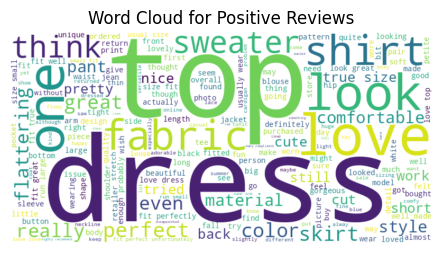

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

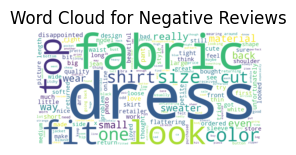

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()